In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from prettytable import PrettyTable

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
#df = pd.concat([df_train, df_test])

In [4]:
df.shape

(1460, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
dict(df.isnull().sum().sort_values(ascending=False))

{'PoolQC': 1453,
 'MiscFeature': 1406,
 'Alley': 1369,
 'Fence': 1179,
 'MasVnrType': 872,
 'FireplaceQu': 690,
 'LotFrontage': 259,
 'GarageYrBlt': 81,
 'GarageCond': 81,
 'GarageType': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'BsmtFinType2': 38,
 'BsmtExposure': 38,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtFinType1': 37,
 'MasVnrArea': 8,
 'Electrical': 1,
 'Id': 0,
 'Functional': 0,
 'Fireplaces': 0,
 'KitchenQual': 0,
 'KitchenAbvGr': 0,
 'BedroomAbvGr': 0,
 'HalfBath': 0,
 'FullBath': 0,
 'BsmtHalfBath': 0,
 'TotRmsAbvGrd': 0,
 'GarageCars': 0,
 'GrLivArea': 0,
 'GarageArea': 0,
 'PavedDrive': 0,
 'WoodDeckSF': 0,
 'OpenPorchSF': 0,
 'EnclosedPorch': 0,
 '3SsnPorch': 0,
 'ScreenPorch': 0,
 'PoolArea': 0,
 'MiscVal': 0,
 'MoSold': 0,
 'YrSold': 0,
 'SaleType': 0,
 'SaleCondition': 0,
 'BsmtFullBath': 0,
 'HeatingQC': 0,
 'LowQualFinSF': 0,
 'LandSlope': 0,
 'OverallQual': 0,
 'HouseStyle': 0,
 'BldgType': 0,
 'Condition2': 0,
 'Condition1': 0,
 'Neighborhood': 0,
 'LotConfig': 0

In [7]:
df.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageFinish','MasVnrArea','GarageQual','GarageCond','GarageType'], axis=1, inplace=True)

In [8]:
mask = df.isnull().mean() > 0.8
df.drop(df.columns[mask], axis=1, inplace=True)

In [9]:
df.shape

(1460, 68)

In [10]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
#sns.pairplot(df1)

<Axes: xlabel='SalePrice', ylabel='Density'>

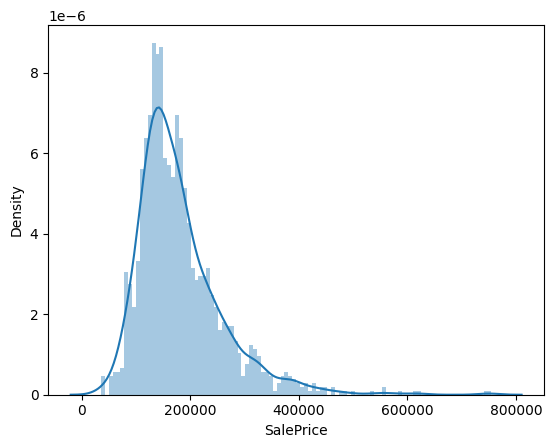

In [12]:
sns.distplot(df['SalePrice'], bins=100)

# **Dummy Variable**

In [13]:
df_dummies= pd.get_dummies(df)

In [14]:
X = df_dummies.drop(['SalePrice'], axis=1)
y = df_dummies['SalePrice']

In [15]:
df_dummies.shape

(1460, 246)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Scaling**

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# **Linear Regression**

In [18]:
lr=LinearRegression()
model_lr=lr.fit(X_train, y_train)
pred_lr=model_lr.predict(X_test)

In [19]:
r2_lr = r2_score(y_test, pred_lr)
print("R2:", r2_lr)
mse_lr = mean_squared_error(y_test, pred_lr)
print("MSE:", mse_lr)
rmse_lr = np.sqrt(mse_lr)
print("RMSE:", rmse_lr)

R2: -2.656210507486403e+24
MSE: 2.037400106737877e+34
RMSE: 1.4273752508495714e+17


<Axes: xlabel='SalePrice'>

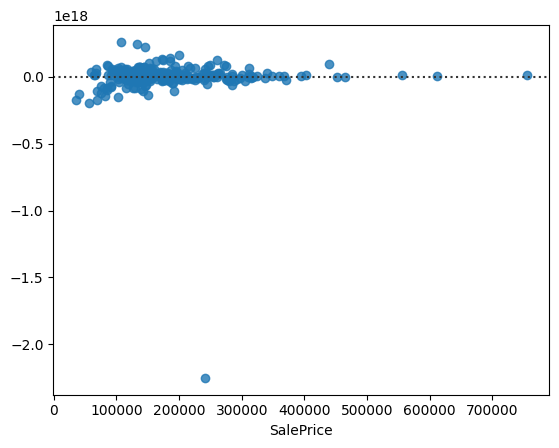

In [20]:
sns.residplot(x=y_test, y=pred_lr) 

# **Random Forest Classifier**

In [21]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [22]:
model_rf=rf.fit(X, y)
pred_rf = model_rf.predict(X)

In [23]:
r2_rf = r2_score(y, pred_rf)
print("R2:", r2_rf)
mse_rf = mean_squared_error(y, pred_rf)
print("MSE:", mse_rf)
rmse_rf = np.sqrt(mse_rf)
print("RMSE:", rmse_rf)

R2: 0.9802368284764406
MSE: 124642144.57508472
RMSE: 11164.324635869592


<Axes: xlabel='SalePrice'>

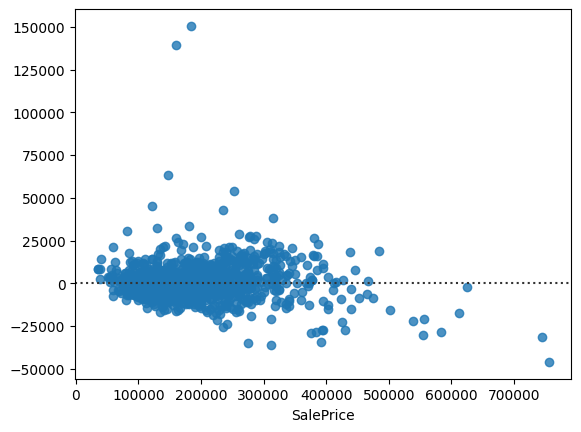

In [24]:
sns.residplot(x=y, y=pred_rf) 

# **Random Forest using Cross Validation**

In [25]:
my_pipeline = make_pipeline(SimpleImputer(), RandomForestRegressor())

In [26]:
from sklearn.model_selection import cross_val_score
scores_rf = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error').round(4)
scores_r2 = cross_val_score(my_pipeline, X, y, scoring='r2').mean().round(4)
print(scores_rf)

[-17451.4436 -16955.8749 -18096.5881 -15892.4686 -19201.2207]


In [27]:
print('R2 score:', scores_r2)
mse_crf=-1 * scores_rf.mean()
print('MSE %2f' %(mse_crf))
rmse_crf=np.sqrt(mse_crf)
print('RMSE %2f' %(rmse_crf))

R2 score: 0.857
MSE 17519.519180
RMSE 132.361321


In [28]:
#logistic regression
result1 = ["1.","Linear Regression"]
result1.append(round(r2_lr*100,2))
result1.append(round(mse_lr,2))
result1.append(round(rmse_lr,2))

#random forest classifier
result2 = ["2.","Random Forest Classifier"]
result2.append(round(r2_rf*100,2))
result2.append(round(mse_rf,2))
result2.append(round(rmse_rf,2))

#random forest classifier with cross val
result3 = ["3.","Random Forest Classifier with Cross Validation"]
result3.append(round(scores_r2*100,2))
result3.append(round(mse_crf,2))
result3.append(round(rmse_crf,2))

In [29]:
Result_table = PrettyTable(["S.No.","Model","R_Squared Score","Mean Squared Error","Root Mean Squared Error"])
Result_table.add_row(result1)
Result_table.add_row(result2)
Result_table.add_row(result3)
print(Result_table)

+-------+------------------------------------------------+------------------------+-----------------------+-------------------------+
| S.No. |                     Model                      |    R_Squared Score     |   Mean Squared Error  | Root Mean Squared Error |
+-------+------------------------------------------------+------------------------+-----------------------+-------------------------+
|   1.  |               Linear Regression                | -2.656210507486403e+26 | 2.037400106737877e+34 |  1.4273752508495714e+17 |
|   2.  |            Random Forest Classifier            |         98.02          |      124642144.58     |         11164.32        |
|   3.  | Random Forest Classifier with Cross Validation |          85.7          |        17519.52       |          132.36         |
+-------+------------------------------------------------+------------------------+-----------------------+-------------------------+
